<a href="https://colab.research.google.com/github/b-part-bot/BearingDefectDetection-OV/blob/main/Model%20Training/Model_inference_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q roboflow
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("bearingfault").project("bearing-defect-1")
dataset = project.version(5).download("yolov9")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.0 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Bearing-Defect-1-5 in yolov9:: 100%|██████████| 3018/3018 [00:00<00:00, 7626.32it/s]


In [2]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch


def detect_and_classify(image_path, model):
    prediction = model.predict(image_path, confidence=30, overlap=30).json()
    detections = prediction['predictions']

    classification = 'Defective' if detections else 'Healthy'

    return detections, classification

def draw_bounding_boxes(image_path, detections, classification):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for detection in detections:
        x1 = int(detection['x'] - detection['width'] / 2)
        y1 = int(detection['y'] - detection['height'] / 2)
        x2 = int(detection['x'] + detection['width'] / 2)
        y2 = int(detection['y'] + detection['height'] / 2)
        label = f"Defect {detection['confidence']:.2f}"
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        img = cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    label_position = (10, 30)
    label_color = (0, 255, 0) if classification == 'Healthy' else (255, 0, 0)
    img = cv2.putText(img, classification, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, label_color, 2)

    return img


project = rf.workspace("bearingfault").project("bearing-defect-1")
model = project.version(5).model


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
#MOdel Inference for binary classification

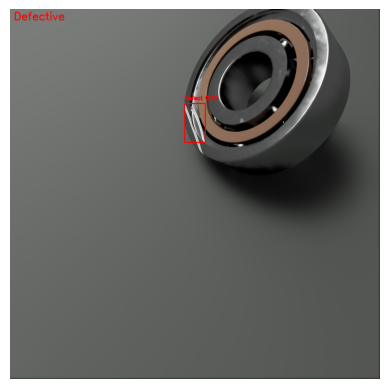

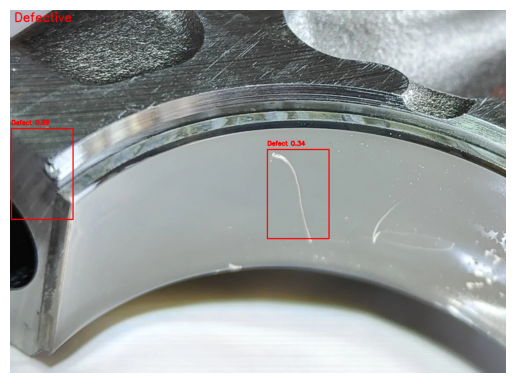

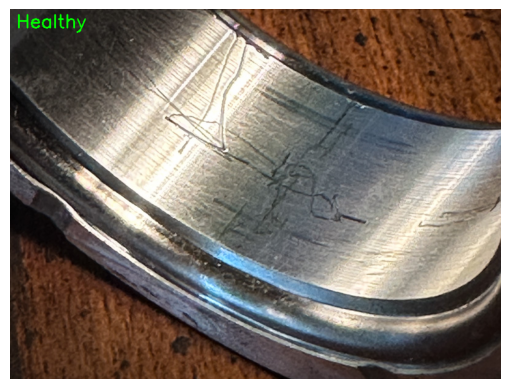

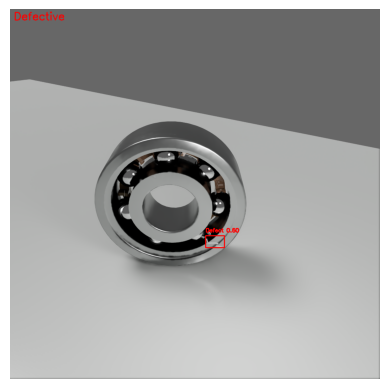

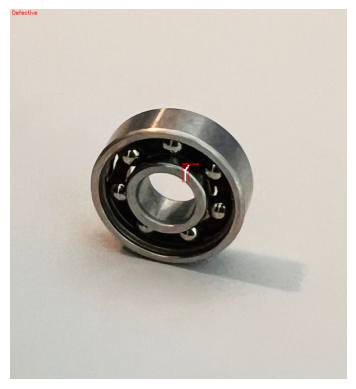

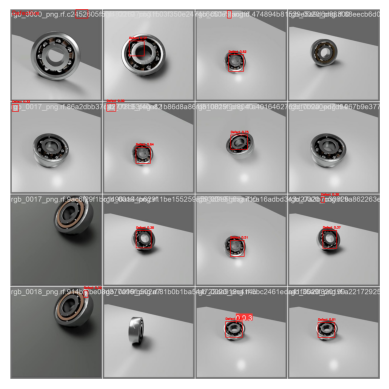

In [3]:
import os
import cv2
import matplotlib.pyplot as plt


input_directory = "/content/input_directory"

output_directory = "/content/output_directory"


for filename in os.listdir(input_directory):
    if filename.endswith(('.jpg', '.png', '.jpeg')):

        image_path = os.path.join(input_directory, filename)


        detections, classification = detect_and_classify(image_path, model)

        result_image = draw_bounding_boxes(image_path, detections, classification)

        output_path = os.path.join(output_directory, f"prediction_{filename}")
        cv2.imwrite(output_path, cv2.cvtColor(result_image, cv2.COLOR_RGB2BGR))

        plt.imshow(result_image)
        plt.axis('off')
        plt.show()
